# Lernmodul Texte

<html><div style="background-color:red;display:inline;font-size:1.25rem;padding:20px;">Stand 03.12.20</div></html>

1. [Einführung](#einführung)
    1. [Motivation] (#motivation)
    2. [Voraussetzungen](#voraussetzungen)
2. [Daten](#daten)
    1. [Textdaten beschaffen](#beschaffen)
    2. [Textdaten erkunden](#erkunden)
    3. [Textdaten aufbereiten](#aufbereiten)
3. [Modell](#modell)
4. [Verwendung](#verwendung)
5. [Abschluss](#abschluss)

## 1. <a id='einführung'>Einführung</a>

### 1.1 <a id='motivation'>Motivation</a>

Die Verarbeitung menschlicher Sprache (Natural Language Processing, NLP) ist ein prominentes Forschungsfeld der Informatik mit ähnlichem Bekanntheitsgrad wie die Analyse visueller Daten (Computer Vision), welche bspw. das Erkennen von Bildern (Image Recognition) sowie ihre Manipulation (Image Augmentation) betrachtet. Im ersten Fall wollen wir einen bekannten bzw. alten Bildinhalt klassifizieren, während der zweite Fall einen unbekannten bzw. neuen Bildinhalt erzeugt.

Wechseln wir von der Bild- auf die Textebene, lässt sich das Forschungsfeld des _NLP_ auf ähnliche Problemstellungen herunterbrechen, die in der folgenden Auflistung aufgeführt sind:

* Texterkennung (Text Recognition)
  * Spracherkennung (Speech Recognition)
  * Stimmungsanalyse (Sentiment Analyses)
* Textmanipulation (Text Augmentation)
  * Maschinelle Übersetzung (Machine Translation)
  * Automatisches Antworten (Question Answering)

Ihr könnt euch bestimmt vorstellen, dass die Erzeugung von gänzlich Neuem aufwendiger ist, als das Entscheiden über vorliegende Inhalte und so beschäftigt sich dieses Lernmodul mit der Texterkennung, im besonderen mit der Unterscheidung zwischen verschiedenen Stimmungen, welche der Verfasser eines Textes gehabt haben könnte. Ein aktuelles Anwendungsbeispiel ist die Identifikation von Hassreden, wie sie bspw. von [Facebook](https://www.facebook.com/) im Zuge ihrer [Community Standards](https://www.facebook.com/communitystandards/hate_speech) verboten sind und erkannt werden müssen.

### 1.2 <a id='voraussetzungen'>Voraussetzungen</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. <a id='daten'>Daten</a>

Daten -> Modell -> Verwendung

Eingabe -> Modell -> Ausgabe

Merkmale -> Modell -> Vorhersage

Datensatz - Eine Sammlung von Beispielen

Beispiel - Eine Sammlung von Merkmalen

Merkmal - Ein numerischer oder symbolischer Wert


### 2.1 <a id='beschaffen'>Textdaten beschaffen</a>

In [2]:
twitter = pd.read_csv('./tweets_biden_small.csv', lineterminator='\n', parse_dates=True)

### 2.2 <a id='erkunden'>Textdaten erkunden</a>

In [3]:
print("Wie sieht der Datensatz aus?")
twitter.head()

Wie sieht der Datensatz aus?


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at\r
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00\r
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283\r
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566\r
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849\r
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132\r


In [4]:
print("Ganz schön viele Spalten. Wie hoch wird wohl der Speicheraufwand in Bytes sein?")
twitter.memory_usage()

Ganz schön viele Spalten. Wie hoch wird wohl der Speicheraufwand in Bytes sein?


Index                   128
created_at              800
tweet_id                800
tweet                   800
likes                   800
retweet_count           800
source                  800
user_id                 800
user_name               800
user_screen_name        800
user_description        800
user_join_date          800
user_followers_count    800
user_location           800
lat                     800
long                    800
city                    800
country                 800
continent               800
state                   800
state_code              800
collected_at\r          800
dtype: int64

In [5]:
print("Wie viele Werte liegen insgesamt vor?")
twitter.size

Wie viele Werte liegen insgesamt vor?


2100

In [6]:
print("Wie viele Beispiele liegen insgesamt vor?")
twitter.shape[0]

Wie viele Beispiele liegen insgesamt vor?


100

In [7]:
print("Wie viele Werte liegen pro Beispiel vor?")
twitter.shape[1]

Wie viele Werte liegen pro Beispiel vor?


21

In [8]:
print("Welche Merkmale bzw. Wertetypen liegen vor?")
twitter.dtypes

Welche Merkmale bzw. Wertetypen liegen vor?


created_at               object
tweet_id                float64
tweet                    object
likes                   float64
retweet_count           float64
source                   object
user_id                 float64
user_name                object
user_screen_name         object
user_description         object
user_join_date           object
user_followers_count    float64
user_location            object
lat                     float64
long                    float64
city                     object
country                  object
continent                object
state                    object
state_code               object
collected_at\r           object
dtype: object

In [9]:
print("Wie sehen die numerischen Wertebereiche aus?")
twitter.describe()

Wie sehen die numerischen Wertebereiche aus?


,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,1.000000e+02,100.000000,100.000000,1.000000e+02,100.000000,42.000000,42.000000
mean,1.316530e+18,16.790000,9.500000,4.611454e+17,1360.510000,39.082246,-69.904194
std,4.618202e+11,102.546692,64.690639,5.771159e+17,2589.434186,8.347839,50.641055
min,1.316529e+18,0.000000,0.000000,1.123392e+07,1.000000,22.279328,-122.330062
25%,1.316530e+18,0.000000,0.000000,2.714127e+08,42.000000,33.825247,-100.445882
50%,1.316530e+18,0.000000,0.000000,2.932144e+09,392.000000,39.783730,-83.539162
75%,1.316530e+18,1.000000,1.000000,1.167090e+18,1535.250000,42.443959,-74.006015
max,1.316531e+18,941.000000,608.000000,1.310330e+18,20614.000000,56.786111,114.162813


In [10]:
print("Wie sehen die ersten Tweets aus?")
tweets = twitter['tweet']
tweets.head()

Wie sehen die ersten Tweets aus?


0    #Elecciones2020 | En #Florida: #JoeBiden dice ...
1    #HunterBiden #HunterBidenEmails #JoeBiden #Joe...
2    @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...
3    @chrislongview Watching and setting dvr. Let’s...
4    #censorship #HunterBiden #Biden #BidenEmails #...
Name: tweet, dtype: object

### 2.3 <a id='aufbereiten'>Textdaten aufbereiten</a>

In [11]:
print("Als Nächstes werden wir alle Symbole entfernen, die weder dem Alphabet angehören, noch Ziffern sind...")
tweets_cleaned = tweets.replace(regex={'[^a-zA-Z0-9\s]' : ''})
tweets_cleaned.head()

Als Nächstes werden wir alle Symbole entfernen, die weder dem Alphabet angehören, noch Ziffern sind...


0    Elecciones2020  En Florida JoeBiden dice que D...
1    HunterBiden HunterBidenEmails JoeBiden JoeBide...
2    IslandGirlPRV BradBeauregardJ MeidasTouch This...
3    chrislongview Watching and setting dvr Lets gi...
4    censorship HunterBiden Biden BidenEmails Biden...
Name: tweet, dtype: object

In [12]:
print("Aus Sätzen werden Wörter. Wir zerteilen die Sequenzen anhand des Leerzeichens:")
tweets_tokenized = tweets_cleaned.str.split()
tweets_tokenized.head()

Aus Sätzen werden Wörter. Wir zerteilen die Sequenzen anhand des Leerzeichens:


0    [Elecciones2020, En, Florida, JoeBiden, dice, ...
1    [HunterBiden, HunterBidenEmails, JoeBiden, Joe...
2    [IslandGirlPRV, BradBeauregardJ, MeidasTouch, ...
3    [chrislongview, Watching, and, setting, dvr, L...
4    [censorship, HunterBiden, Biden, BidenEmails, ...
Name: tweet, dtype: object

In [13]:
tweets_length = [len(tweet) for tweet in tweets_tokenized]
print("Wie viele Wörter sind im längsten Tweet enthalten?")
np.max(tweets_length)

Wie viele Wörter sind im längsten Tweet enthalten?


50

In [14]:
def plot_tweet_length_distribution(tweets_length):
    """Count tokens per tweet and plot their length distribution."""

    plt.hist(tweets_length, np.max(tweets_length))
    plt.xlabel('Words per tweet')
    plt.ylabel('Amount of tweets')
    plt.title('Tweet length distribution')
    plt.show()

Wie viele Tweets haben eine bestimmte Länge?


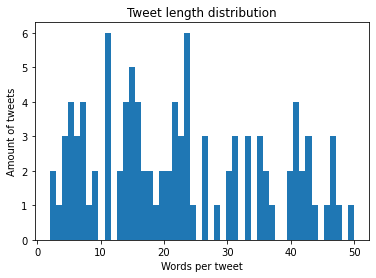

In [15]:
print("Wie viele Tweets haben eine bestimmte Länge?")
plot_tweet_length_distribution(tweets_length)

## 3. <a id='modell'>Modell</a>

## 4. <a id='verwendung'>Verwendung</a>

## 5. <a id='abschluss'>Abschluss</a>